## Tarea 14

__ Ejercicio 1:__

In [1]:
using Plots
using LaTeXStrings
using SymPy

In [11]:
function RungeKutta4th(f,xo,to,t,h)#Aqui preferí hacer el método con los 5 parametros para que el usuario pueda elegir t0 y tf directamente cada que usa el método.
    x=xo
    listt=to:h:t
    listx=[xo[1]]
    listv=[xo[2]]
    for i in 1:length(listt)-1
        
    k1=f(x,listt[i])
    k2=f(x+(h/2)*k1,listt[i]+h/2) 
    k3=f(x+(h/2)*k2,listt[i]+h/2) 
    k4=f(x+h*k3,listt[i]+h)
        
    x=x+(h/6)*(k1+2k2+2k3+k4)
        
        push!(listx,x[1])
        push!(listv,x[2])
    end
    return listt,listx,listv
end

RungeKutta4th (generic function with 1 method)


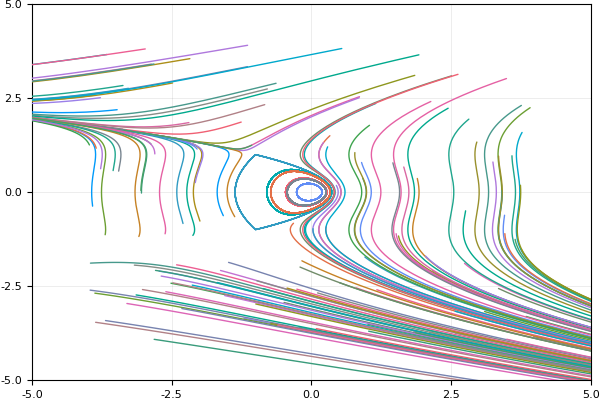

In [33]:
f(x,t)=[x[2]-x[2]^3,-x[1]-x[2]^2]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:150 
ci=rand(2,1)*(8) -4
τ=RungeKutta4th(f,ci,-50,50,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-50,50,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-50,50,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-5,5),ylims=(-5,5))

In [13]:
x,y=Sym("x"),Sym("y");

In [14]:
F=[y-y^3,-x-y^2]; 
J=[diff(F[1],x) diff(F[1],y); diff(F[2],x) diff(F[2],y)]
D=[J[1,1] J[1,2](0); J[2,1] J[2,2](0)]

2×2 Array{SymPy.Sym,2}:
  0  1
 -1  0

In [15]:
det(D),trace(D)

(1, 0)

El punto fijo es un centro dado que está sobre el eje x positivo como nos dice el diagrama de Strogratz

__Ejercicio 2:__ Resolver usando Runge-Kutta orden 4 para resolver el oscilador de van der Pol:
$${d^2x \over dt^2}-\mu(1-x^2){dx \over dt}+x= 0$$
* Graficar muchas trayectorias, construidas a partir de condiciones iniciales aleatorias, en el espacio de fase. Observa alguna estructura en particular?
* Usen $\mu=0.5$.
* Grafiquen varias trayectorias en los espacios $(x,t)$ y $(y=\dot x,t)$.

Hice algunas gráficas para diferentes valores de $\mu$ para poder observar como cambian las trayectorias.


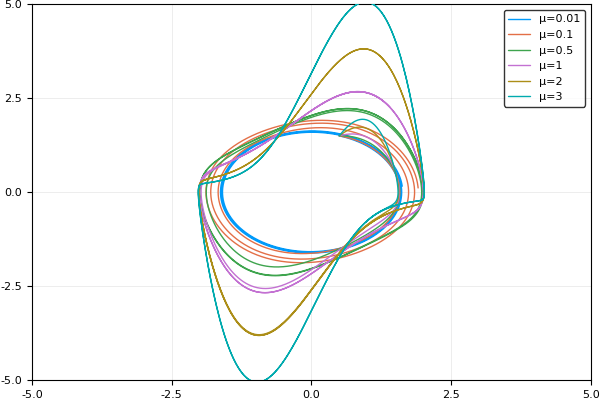

In [16]:
ci=[0.5,1.5]
f(x,t)=[x[2],0.01*(1-x[1]^2)*x[2]-x[1]]
θ=RungeKutta4th(f,ci,-10,10,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-10,10,0.01)[3];  # dθ/dt
plot(θ,dθ,label="",xlims=(-5,5),ylims=(-5,5),label="μ=0.01")

f(x,t)=[x[2],0.1*(1-x[1]^2)*x[2]-x[1]]
θ=RungeKutta4th(f,ci,-10,10,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-10,10,0.01)[3];  # dθ/dt
plot!(θ,dθ,label="",xlims=(-5,5),ylims=(-5,5),label="μ=0.1")

f(x,t)=[x[2],0.5*(1-x[1]^2)*x[2]-x[1]]
θ=RungeKutta4th(f,ci,-10,10,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-10,10,0.01)[3];  # dθ/dt
plot!(θ,dθ,label="",xlims=(-5,5),ylims=(-5,5),label="μ=0.5")

f(x,t)=[x[2],1*(1-x[1]^2)*x[2]-x[1]]
θ=RungeKutta4th(f,ci,-10,10,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-10,10,0.01)[3];  # dθ/dt
plot!(θ,dθ,label="",xlims=(-5,5),ylims=(-5,5),label="μ=1")

f(x,t)=[x[2],2*(1-x[1]^2)*x[2]-x[1]]
θ=RungeKutta4th(f,ci,-10,10,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-10,10,0.01)[3];  # dθ/dt
plot!(θ,dθ,label="",xlims=(-5,5),ylims=(-5,5),label="μ=2")

f(x,t)=[x[2],3*(1-x[1]^2)*x[2]-x[1]]
θ=RungeKutta4th(f,ci,-10,10,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-10,10,0.01)[3];  # dθ/dt
plot!(θ,dθ,label="",xlims=(-5,5),ylims=(-5,5),label="μ=3")

Podemos apreciar como cuando $\mu$ se hace más grande se va alejando de las trayectorias circulares además como esperabamos cuando $\mu$ se hace pequeño la trayectoria del espacio fase tiende a una tryectoria circular esto porque la ecuación diferencial se parece cada vez más a la del oscilador armónico cuando $\mu$ tiende a 0.

Aquí grafiqué diferentes condiciones iniciales con $\mu=0.5$


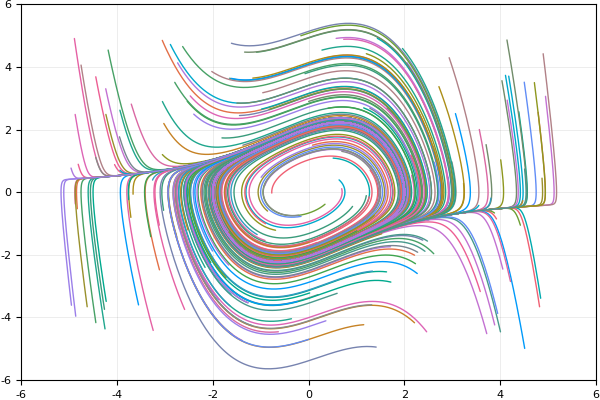

In [25]:
f(x,t)=[x[2],0.5*(1-x[1]^2)*x[2]-x[1]]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:200 
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-50,50,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-50,50,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-50,50,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-6,6),ylims=(-6,6))


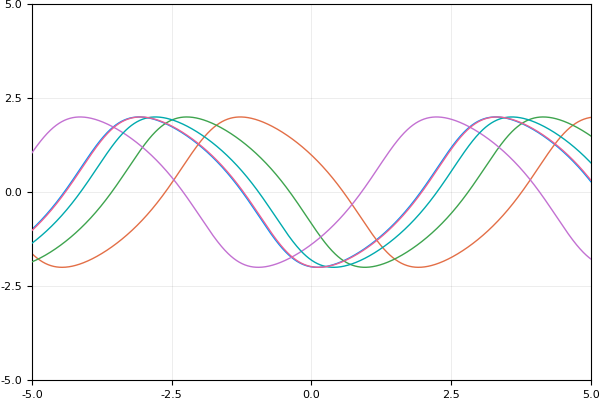

In [31]:
T=[]
X=[]
Y=[]
for i in 1:7
ci=rand(2,1)*(50) -25
τ=RungeKutta4th(f,ci,-50,50,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-50,50,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-50,50,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(T,X,label="",xlims=(-5,5),ylims=(-5,5))


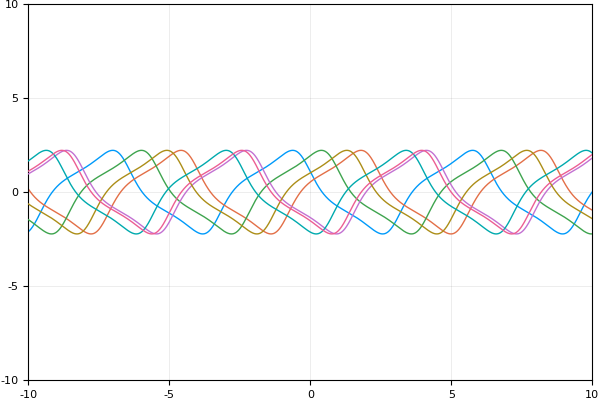

In [30]:
T=[]
X=[]
Y=[]
for i in 1:7
ci=rand(2,1)*(10) -5
τ=RungeKutta4th(f,ci,-50,50,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-50,50,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-50,50,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(T,Y,label="",xlims=(-10,10),ylims=(-10,10))

__Ejercicio 3:__ Graficar muchas trayectorias del sistema del ejercicio 1 en el espacio de fase. Utílicen rangos apropiados de acuerdo a donde vimos que estan los puntos fijos.


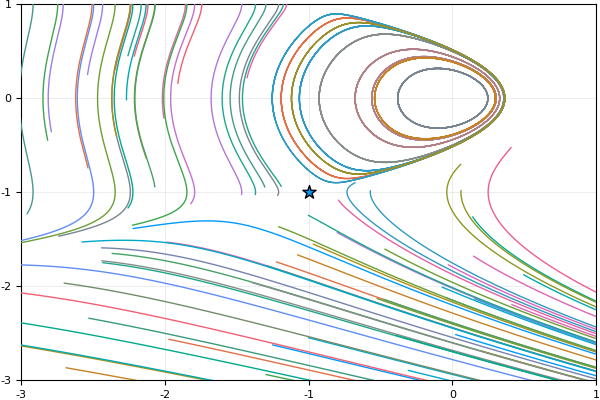

In [151]:
f(x,t)=[x[2]-x[2]^3,-x[1]-x[2]^2]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:150 
ci=rand(2,1)*(5)-4.5
τ=RungeKutta4th(f,ci,-10,20,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-10,20,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-10,20,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-3,1),ylims=(-3,1),xticks=-10:10,yticks=-10:10)
plot!([-1],[-1],shape=:star,label="",markersize=10)


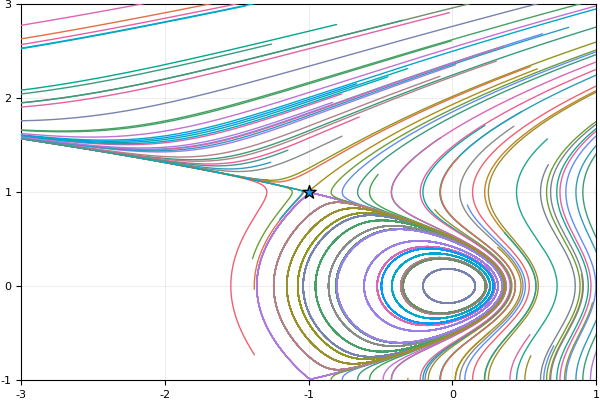

In [149]:
f(x,t)=[x[2]-x[2]^3,-x[1]-x[2]^2]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:150 
ci=rand(2,1)*(5)-1.5
τ=RungeKutta4th(f,ci,-50,50,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-50,50,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-50,50,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-3,1),ylims=(-1,3),xticks=-10:10,yticks=-10:10)
plot!([-1],[1],shape=:star,label="",markersize=10)

__Ejercicio 4:__ Hacer lo mismo para el sistema:
\begin{align*}
\dot x&= x+y-x (x^2+y^2)\\
\dot y &= y-x-y(x^2+y^2)
\end{align*}
Y comprobar numéricamente que hay un repulsor en $(0,0)$ y un ciclo límite (conjunto atractor) en $x^2+y^2=1$, para cotejar con lo que vimos en clase.


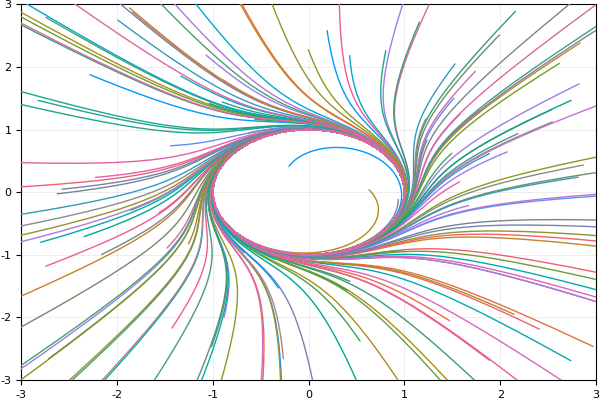

In [153]:
f(x,t)=[x[1]+x[2]-x[1]*(x[1]^2+x[2]^2),-x[1]+x[2]-x[2]*(x[1]^2+x[2]^2)]
#--------------------------------#
T=[]
X=[]
Y=[]
for i in 1:150 
ci=rand(2,1)*(8) -4
τ=RungeKutta4th(f,ci,-50,50,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,-50,50,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,-50,50,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-3,3),ylims=(-3,3))



In [154]:
Y[1].^2+X[1].^2   

10001-element Array{Float64,1}:
 8.73569
 7.57532
 6.70264
 6.02257
 5.47779
 5.03165
 4.65966
 4.34481
 4.07492
 3.84105
 3.63647
 3.45605
 3.29577
 ⋮      
 1.0    
 1.0    
 1.0    
 1.0    
 1.0    
 1.0    
 1.0    
 1.0    
 1.0    
 1.0    
 1.0    
 1.0    

Podemos observar que el  $x^2+y^2=1$ es un ciclo límite observando los valores del arreglo solución anterior. Y podemos observar de las trayectorias graficadas que el (0,0) es un repulsor, pues cuando t avanza las trayectorias se alejan del origen.


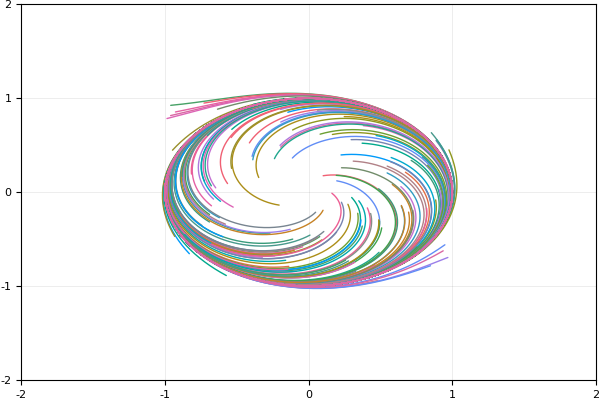

In [170]:
T=[]
X=[]
Y=[]
for i in 1:150 
ci=rand(2,1)*(2) -1
τ=RungeKutta4th(f,ci,0,50,0.01)[1]  #parametro t
θ=RungeKutta4th(f,ci,0,50,0.01)[2]  # θ
dθ=RungeKutta4th(f,ci,0,50,0.01)[3];  # dθ/dt
 
    push!(T,τ)
    push!(X,θ)  
    push!(Y,dθ) 
end
plot(X,Y,label="",xlims=(-2,2),ylims=(-2,2))




In [194]:
F=[x+y-x*(x^2+y^2),y-x-y*(x^2+y^2)]; 
J=[diff(F[1],x) diff(F[1],y); diff(F[2],x) diff(F[2],y)]
D=[J[1,1](0,0) J[1,2](0,0); J[2,1](0,0) J[2,2](0,0)]
eigvals(D)


2-element Array{Any,1}:
 1 + I
 1 - I

Veamos también que el calculo de los eigenvalores de la matriz jacobiana nos dio dos las dos partes reales positivas lo que nos indica nuevamente que en (0,0) nuestro punto fijo es un repulsor.